In [1]:
import pandas as pd
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go
plotly.offline.init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib_venn import venn2, venn3

pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', -1)  # or 199

In [2]:
# Global options

sns.set_style("white")
sns.set(font_scale=2, style="ticks")

height=15
aspect=1
x_jitter=0
y_jitter=0

xlim=(-9,3)
ylim=(-12, 4)
alpha=1
marker='.'
legend=False

In [3]:
def prepare_df(df_path, df_name):

    """Read in information from dataframe"""

    # read in df1
    df = pd.read_csv(df_path, header=0, sep="\t")
    # Mark significants
    df["Significant"]  = "No"
    df.loc[(df["FDR"] < 0.05), "Significant"] = "FDR<0.05"
    # set id as index
    df.set_index("id", inplace=True)
    # rename columns
    df.columns = df.columns + "_" + df_name
    # reset index
    df.reset_index(inplace=True)

    return df

In [4]:
def plot_MA(df, df_name):

    """Plot MA"""
    sns_plot = sns.lmplot(x=f"logCPM_{df_name}",
                          y=f"logFC_{df_name}",
                          data=df,
                          fit_reg=False,
                          hue=f"Significant_{df_name}",
                          hue_order=["No", "FDR<0.05"],
                          palette=["black", "blue"],
                          scatter_kws={'alpha':alpha},
                          height=height,
                          aspect=aspect,
                          x_jitter=x_jitter,
                          y_jitter=y_jitter,
                          markers=marker,
                          legend=legend)
    sns_plot = plt.gca()
    sns_plot.set_title(f"MA plot for {df_name}")
    sns_plot.spines['right'].set_visible(True)
    sns_plot.spines['top'].set_visible(True)
#     sns_plot.set(xlim=xlim, ylim=ylim)

In [5]:
def merge_df(df_1, df_2):
    
    """Merge dataframes"""
    
    df = pd.merge(df_1, df_2, on="id", how="inner")
    df["Significant"] = "No"
    return df

In [6]:
def plot_FC_correlation(df, FC_1_name, FC_2_name, hue, hue_order):

    """Plot correlation between FCs"""

    sns_plot = sns.lmplot(f"logFC_{FC_1_name}",
                          y=f"logFC_{FC_2_name}",
                          data=df,
                          fit_reg=False,
                          hue=hue,
                          hue_order=hue_order,
                          palette=["black", "red", "blue", "green"],
                          scatter_kws={'alpha':alpha},
                          height=height,
                          aspect=aspect,
                          x_jitter=x_jitter,
                          y_jitter=y_jitter,
                          markers=marker,
                          legend=legend)
    sns_plot = plt.gca()
    sns_plot.set_title(f"FCs between {FC_1_name} and {FC_2_name}")
    sns_plot.spines['right'].set_visible(True)
    sns_plot.spines['top'].set_visible(True)
    sns_plot.set(xlim=xlim, ylim=ylim)

    plt.savefig(f"FC_vs_FC__{df_1_name}__vs__{df_2_name}.pdf")

In [7]:
def plot_FC_correlation_mark_genes(df, FC_1_name, FC_2_name, hue, hue_order):

    """Plot correlation between FCs"""

    sns_plot = sns.lmplot(f"logFC_{FC_1_name}",
                          y=f"logFC_{FC_2_name}",
                          data=df,
                          fit_reg=False,
                          hue=hue,
                          hue_order=hue_order,
                          palette=["black", "red", "blue", "green"],
                          scatter_kws={'alpha':alpha},
                          height=height,
                          aspect=aspect,
                          x_jitter=x_jitter,
                          y_jitter=y_jitter,
                          markers=marker,
                          legend=legend)
    sns_plot = plt.gca()
    sns_plot.set_title(f"FCs between {FC_1_name} and {FC_2_name}")
    sns_plot.spines['right'].set_visible(True)
    sns_plot.spines['top'].set_visible(True)
    sns_plot.set(xlim=xlim)
    sns_plot.set(xlim=xlim, ylim=ylim)

    plt.savefig(f"FC_vs_FC__{df_1_name}__vs__{df_2_name}__MARK_GENES.pdf")

In [8]:
def compare(df_1_path, df_2_path, df_1_name, df_2_name):
    
    "Combine multiple functions"
    
    df_1 = prepare_df(df_1_path, df_1_name)
    plot_MA(df_1, df_1_name)
    df_2 = prepare_df(df_2_path, df_2_name)
    plot_MA(df_2, df_2_name)
    
    df_merged = merge_df(df_1, df_2)
    
#     plot_FC_correlation(df_merged, df_1_name, df_2_name, hue="Significant")
#     plot_FC_correlation(df_merged, df_1_name, df_2_name, hue="Significant_" + df_1_name)
#     plot_FC_correlation(df_merged, df_1_name, df_2_name, hue="Significant_" + df_2_name)
    
    return df_merged

In [9]:
def plot_merged_MA_plot(df_1_path, df_2_path, df_1_name, df_2_name):

    df_all = compare(df_1_path, df_2_path, df_1_name, df_2_name)

    df_all["Significant"] = "No"

    df_all.loc[(df_all[f"FDR_{df_2_name}"]<0.05), "Significant"] = f"FDR_{df_2_name}<0.05"

    df_all.loc[(df_all[f"FDR_{df_2_name}"]<0.05) &
               (df_all[f"FDR_{df_1_name}"]<0.05) &
               (df_all[f"logFC_{df_1_name}"]>0),
                "Significant"] = f"FDR_{df_2_name}<0.05\nFDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0"


    sns_plot = sns.lmplot(x=f"logCPM_{df_2_name}",
                          y=f"logFC_{df_2_name}",
                          data=df_all,
                          fit_reg=False,
                          hue=f"Significant",
                          hue_order=["No", f"FDR_{df_2_name}<0.05", f"FDR_{df_2_name}<0.05\nFDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0"],
                          palette=["black", "blue", "red"],
                          scatter_kws={'alpha':alpha},
                          height=height,
                          aspect=aspect,
                          x_jitter=x_jitter,
                          y_jitter=y_jitter,
                          markers=marker,
                          legend=legend)


    sns_plot = plt.gca()
    sns_plot.set_title(f"MA plot")
    sns_plot.spines['right'].set_visible(True)
    sns_plot.spines['top'].set_visible(True)
    # sns_plot.set(xlim=xlim, ylim=ylim)

    print(pd.DataFrame(df_all["Significant"].value_counts()))

In [10]:
# Input prefix
small_rna_prefix = "/tungstenfs/scratch/ggrossha/gypafoiv/projects/GROUP_PROJECTS/rajani/small_RNAs_Rajani/01_small_RNA_seq_15_C/results/filter/DE_htseq_count__alignment_sorted_filtered_unique_mappers__reverse__"

In [11]:
suffix = "/DE_edgeR/final_table_with_gene_info.tsv"

In [12]:
# Input files

# small_RNAs

# WT Dpf_3_null
small_rna__WT__Dpf_3_null_path = small_rna_prefix + "WT__Dpf_3_null" + suffix
small_rna__WT__Dpf_3_null_name = "Dpf_3_null__over__WT"

small_rna__WT_A_B_C__Dpf_3_null_path = small_rna_prefix + "WT_A_B_C__Dpf_3_null" + suffix
small_rna__WT_A_B_C__Dpf_3_null_name = "Dpf_3_null__over__WT_A_B_C"

small_rna__WT_D_E_F__Dpf_3_null_path = small_rna_prefix + "WT_D_E_F__Dpf_3_null" + suffix
small_rna__WT_D_E_F__Dpf_3_null_name = "Dpf_3_null__over__WT_D_E_F"

# WT Dpf_3_S784A
small_rna__WT__Dpf_3_S784A_path = small_rna_prefix + "WT__Dpf_3_S784A" + suffix
small_rna__WT__Dpf_3_S784A_name = "Dpf_3_S784A__over__WT"

small_rna__WT_A_B_C__Dpf_3_S784A_path = small_rna_prefix + "WT_A_B_C__Dpf_3_S784A" + suffix
small_rna__WT_A_B_C__Dpf_3_S784A_name = "Dpf_3_S784A__over__WT_A_B_C"

small_rna__WT_D_E_F__Dpf_3_S784A_path = small_rna_prefix + "WT_D_E_F__Dpf_3_S784A" + suffix
small_rna__WT_D_E_F__Dpf_3_S784A_name = "Dpf_3_S784A__over__WT_D_E_F"


# WT mut_2
small_rna__WT__mut_2_path = small_rna_prefix + "WT__mut_2" + suffix
small_rna__WT__mut_2_name = "mut_2__over__WT"

small_rna__WT_A_B_C__mut_2_path = small_rna_prefix + "WT_A_B_C__mut_2" + suffix
small_rna__WT_A_B_C__mut_2_name = "mut_2__over__WT_A_B_C"

small_rna__WT_D_E_F__mut_2_path = small_rna_prefix + "WT_D_E_F__mut_2" + suffix
small_rna__WT_D_E_F__mut_2_name = "mut_2__over__WT_D_E_F"


# WT mut_7
small_rna__WT__mut_7_path = small_rna_prefix + "WT__mut_7" + suffix
small_rna__WT__mut_7_name = "mut_7__over__WT"

small_rna__WT_A_B_C__mut_7_path = small_rna_prefix + "WT_A_B_C__mut_7" + suffix
small_rna__WT_A_B_C__mut_7_name = "mut_7__over__WT_A_B_C"

small_rna__WT_D_E_F__mut_7_path = small_rna_prefix + "WT_D_E_F__mut_7" + suffix
small_rna__WT_D_E_F__mut_7_name = "mut_7__over__WT_D_E_F"

#### important note: we perform an inner join in the merge

## dpf-3 null over WT (A,B,C) vs Dpf-3 S784A over WT (D,E,F)

In [13]:
df_1_path = small_rna__WT_A_B_C__Dpf_3_null_path
df_1_name = small_rna__WT_A_B_C__Dpf_3_null_name

df_2_path = small_rna__WT_D_E_F__Dpf_3_S784A_path
df_2_name = small_rna__WT_D_E_F__Dpf_3_S784A_name

********************************************************************************
                                                                           Significant
FDR_Dpf_3_null__over__WT_A_B_C<0.05\nFDR_Dpf_3_S784A__over__WT_D_E_F<0.05  998        
No                                                                         692        
FDR_Dpf_3_null__over__WT_A_B_C<0.05                                        519        
FDR_Dpf_3_S784A__over__WT_D_E_F<0.05                                       123        
********************************************************************************
                                                                           Significant
No                                                                         1334       
FDR_Dpf_3_null__over__WT_A_B_C<0.05\nFDR_Dpf_3_S784A__over__WT_D_E_F<0.05  998        
********************************************************************************


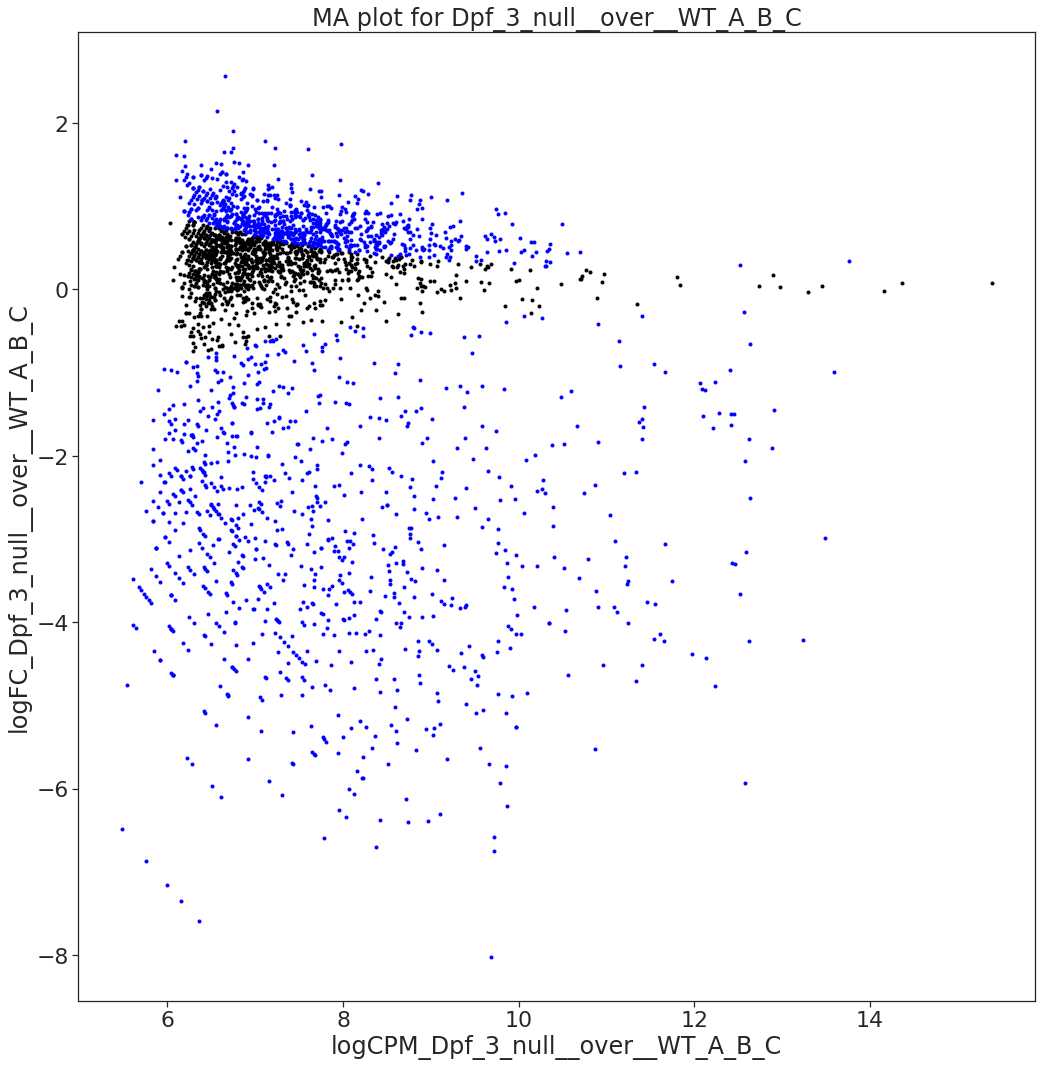

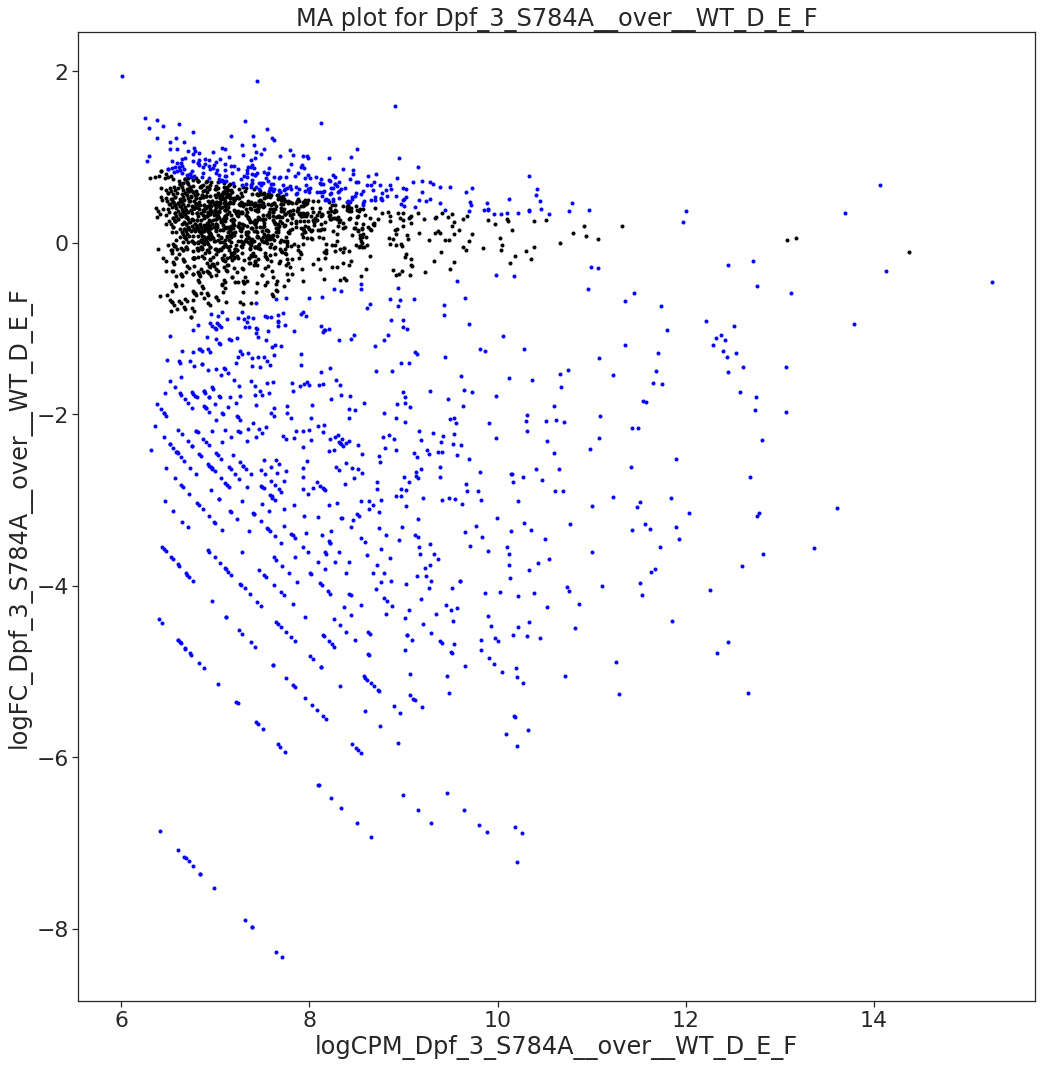

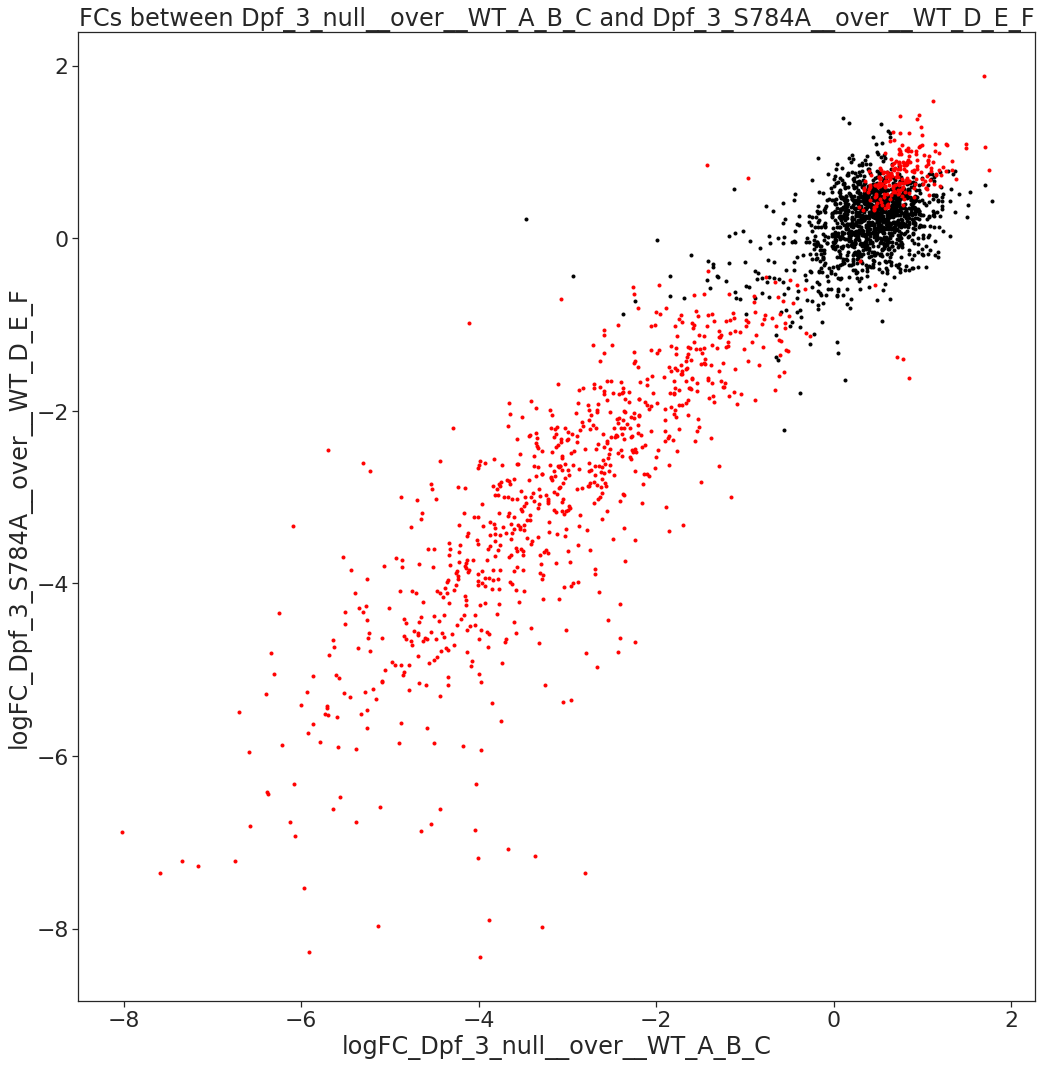

In [14]:
df_all = compare(df_1_path, df_2_path, df_1_name, df_2_name)

df_all["Significant"] = "No"

df_all.loc[(df_all[f"FDR_{df_1_name}"]<0.05),
            "Significant"] = f"FDR_{df_1_name}<0.05"

df_all.loc[(df_all[f"FDR_{df_2_name}"]<0.05),
            "Significant"] = f"FDR_{df_2_name}<0.05"

df_all.loc[(df_all[f"FDR_{df_1_name}"]<0.05) &
           (df_all[f"FDR_{df_2_name}"]<0.05),
            "Significant"] = f"FDR_{df_1_name}<0.05\nFDR_{df_2_name}<0.05"

print("*"*80)
print(pd.DataFrame(df_all["Significant"].value_counts()))

df_all["Significant"] = "No"

df_all.loc[(df_all[f"FDR_{df_1_name}"]<0.05) &
           (df_all[f"FDR_{df_2_name}"]<0.05),
            "Significant"] = f"FDR_{df_1_name}<0.05\nFDR_{df_2_name}<0.05"


sns_plot = sns.lmplot(f"logFC_{df_1_name}",
                      y=f"logFC_{df_2_name}",
                      data=df_all,
                      fit_reg=False,
                      hue="Significant",
                      hue_order=["No", f"FDR_{df_1_name}<0.05\nFDR_{df_2_name}<0.05"],
                      palette=["black", "red", "blue", "green"],
                      scatter_kws={'alpha':alpha},
                      height=height,
                      aspect=aspect,
                      x_jitter=x_jitter,
                      y_jitter=y_jitter,
                      markers=marker,
                      legend=legend)
sns_plot = plt.gca()
sns_plot.set_title(f"FCs between {df_1_name} and {df_2_name}")
sns_plot.spines['right'].set_visible(True)
sns_plot.spines['top'].set_visible(True)

plt.savefig(f"FC_vs_FC__{df_1_name}__vs__{df_2_name}.pdf")

print("*"*80)
print(pd.DataFrame(df_all["Significant"].value_counts()))
print("*"*80)

In [15]:
down_regulated_Dpf_3_null_and_Dpf_3_S784A = df_all[(df_all["Significant"] == f"FDR_{df_1_name}<0.05\nFDR_{df_2_name}<0.05") & (df_all[f"logFC_{df_1_name}"]<0) & (df_all[f"logFC_{df_2_name}"]<0)]["id"].to_list()

## dpf-3 null over WT (A,B,C) vs mut-2 over WT (D,E,F)

In [16]:
df_1_path = small_rna__WT_A_B_C__Dpf_3_null_path
df_1_name = small_rna__WT_A_B_C__Dpf_3_null_name

df_2_path = small_rna__WT_D_E_F__mut_2_path
df_2_name = small_rna__WT_D_E_F__mut_2_name

********************************************************************************
                                                                     Significant
FDR_Dpf_3_null__over__WT_A_B_C<0.05\nFDR_mut_2__over__WT_D_E_F<0.05  1092       
FDR_Dpf_3_null__over__WT_A_B_C<0.05                                  343        
No                                                                   331        
FDR_mut_2__over__WT_D_E_F<0.05                                       325        
********************************************************************************
                                                                     Significant
FDR_Dpf_3_null__over__WT_A_B_C<0.05\nFDR_mut_2__over__WT_D_E_F<0.05  1092       
No                                                                   999        
********************************************************************************


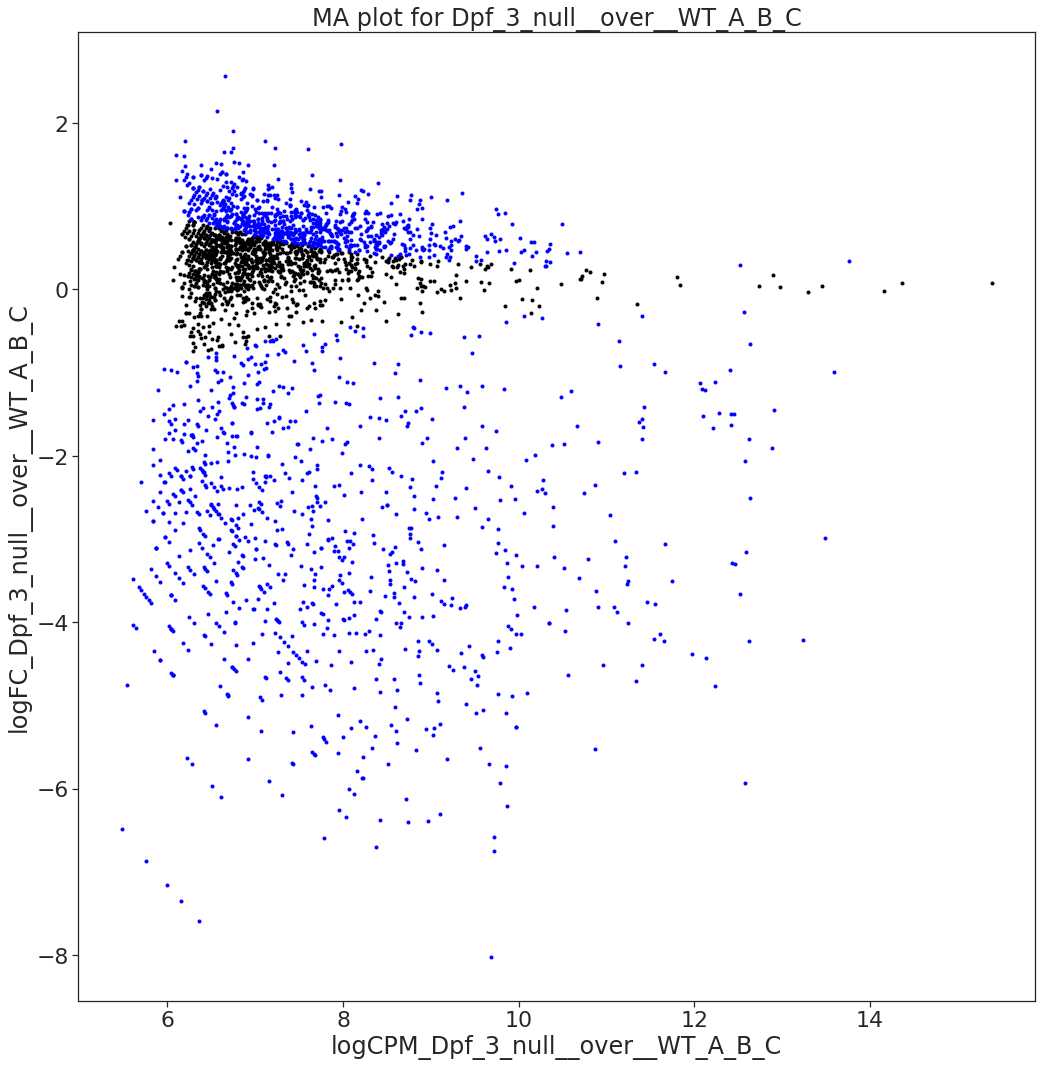

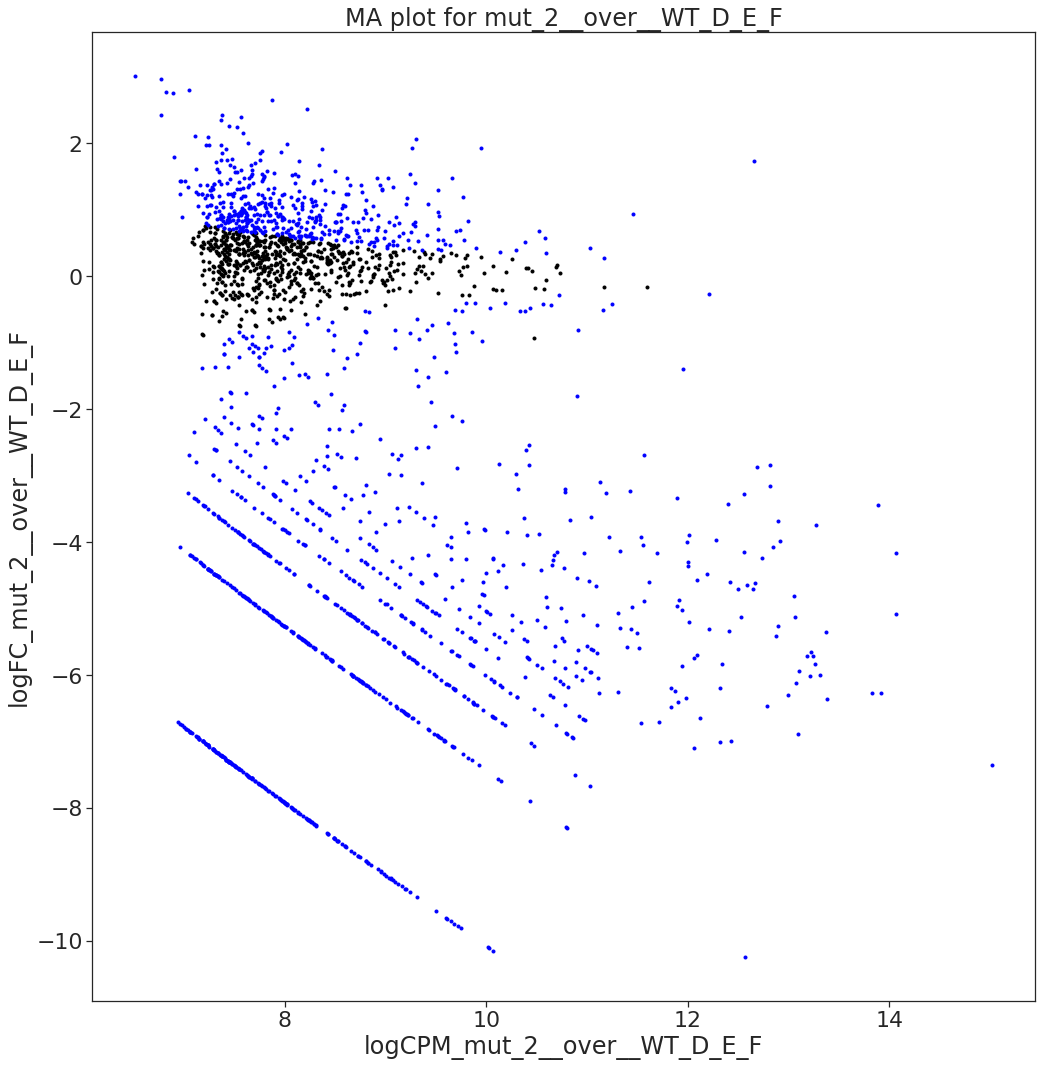

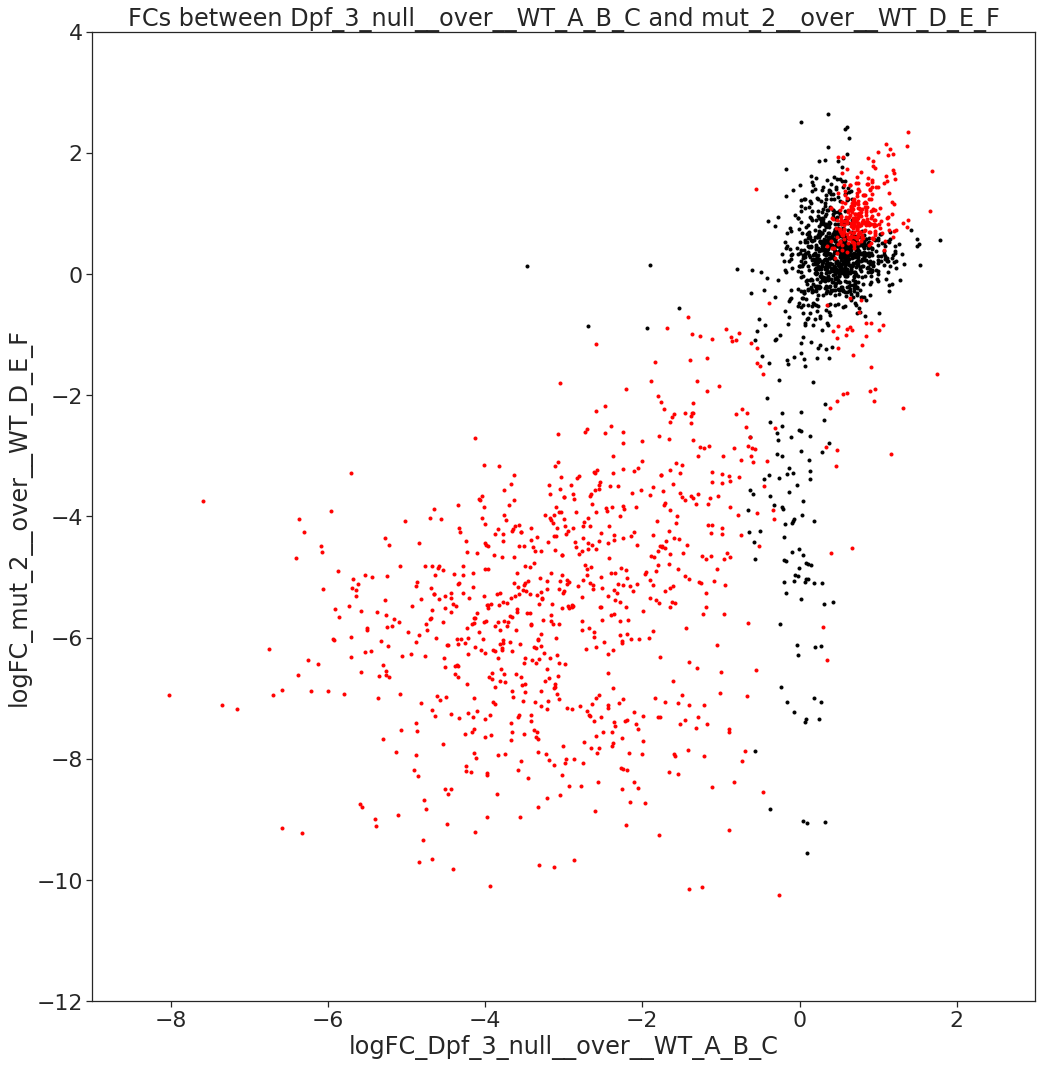

In [17]:
df_all = compare(df_1_path, df_2_path, df_1_name, df_2_name)

df_all["Significant"] = "No"

df_all.loc[(df_all[f"FDR_{df_1_name}"]<0.05),
            "Significant"] = f"FDR_{df_1_name}<0.05"

df_all.loc[(df_all[f"FDR_{df_2_name}"]<0.05),
            "Significant"] = f"FDR_{df_2_name}<0.05"

df_all.loc[(df_all[f"FDR_{df_1_name}"]<0.05) &
           (df_all[f"FDR_{df_2_name}"]<0.05),
            "Significant"] = f"FDR_{df_1_name}<0.05\nFDR_{df_2_name}<0.05"

print("*"*80)
print(pd.DataFrame(df_all["Significant"].value_counts()))

df_all["Significant"] = "No"

df_all.loc[(df_all[f"FDR_{df_1_name}"]<0.05) &
           (df_all[f"FDR_{df_2_name}"]<0.05),
            "Significant"] = f"FDR_{df_1_name}<0.05\nFDR_{df_2_name}<0.05"

plot_FC_correlation(df_all, df_1_name, df_2_name, "Significant", ["No",
                                                                  f"FDR_{df_1_name}<0.05\nFDR_{df_2_name}<0.05"])

print("*"*80)
print(pd.DataFrame(df_all["Significant"].value_counts()))
print("*"*80)

## dpf-3 null over WT (A,B,C) vs mut-2 over WT (D,E,F) (MARK GENES that are down_regulated_Dpf_3_null_and_Dpf_3_S784A)

In [18]:
df_1_path = small_rna__WT_A_B_C__Dpf_3_null_path
df_1_name = small_rna__WT_A_B_C__Dpf_3_null_name

df_2_path = small_rna__WT_D_E_F__mut_2_path
df_2_name = small_rna__WT_D_E_F__mut_2_name

                                    Significant
No                                  1326       
down in Dpf_3_null_and_Dpf_3_S784A  765        


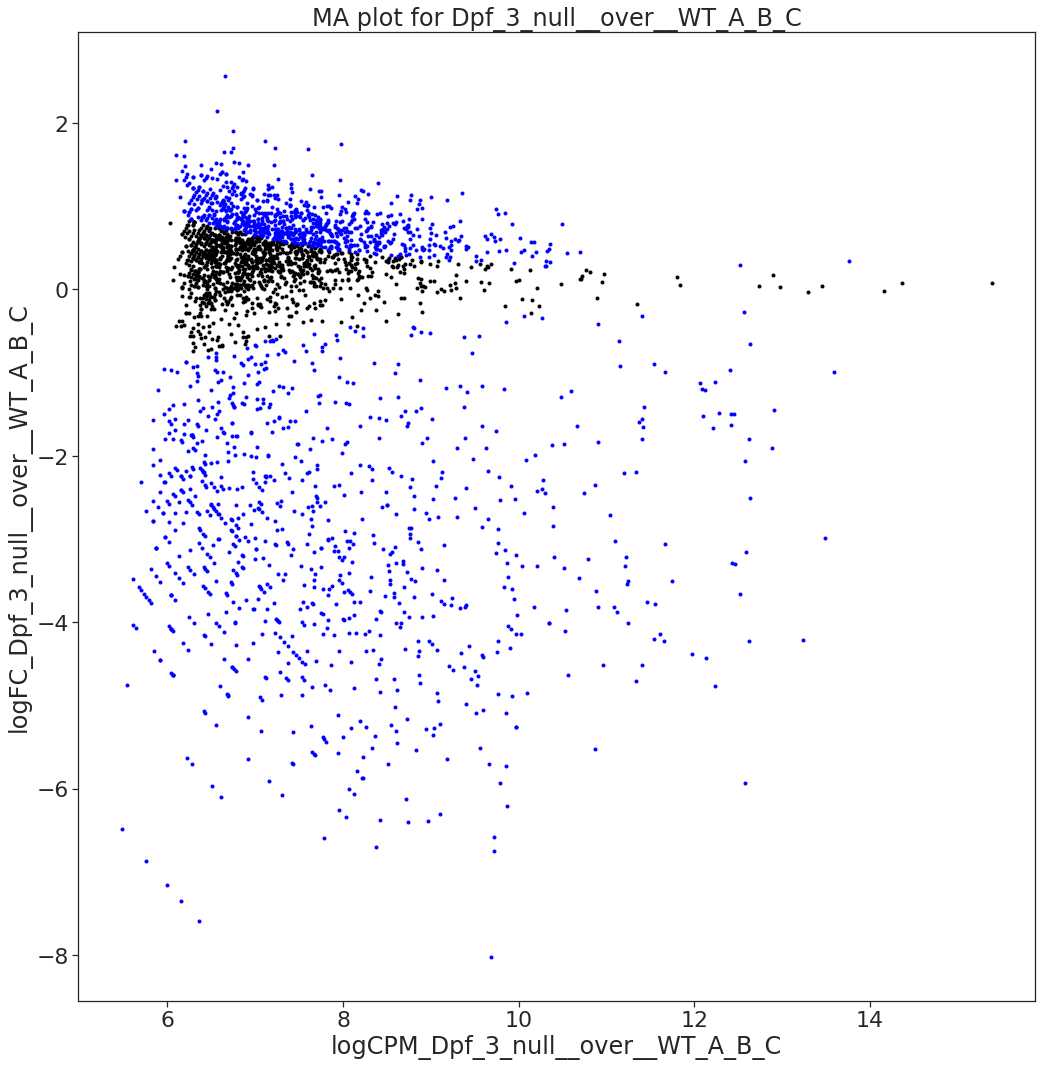

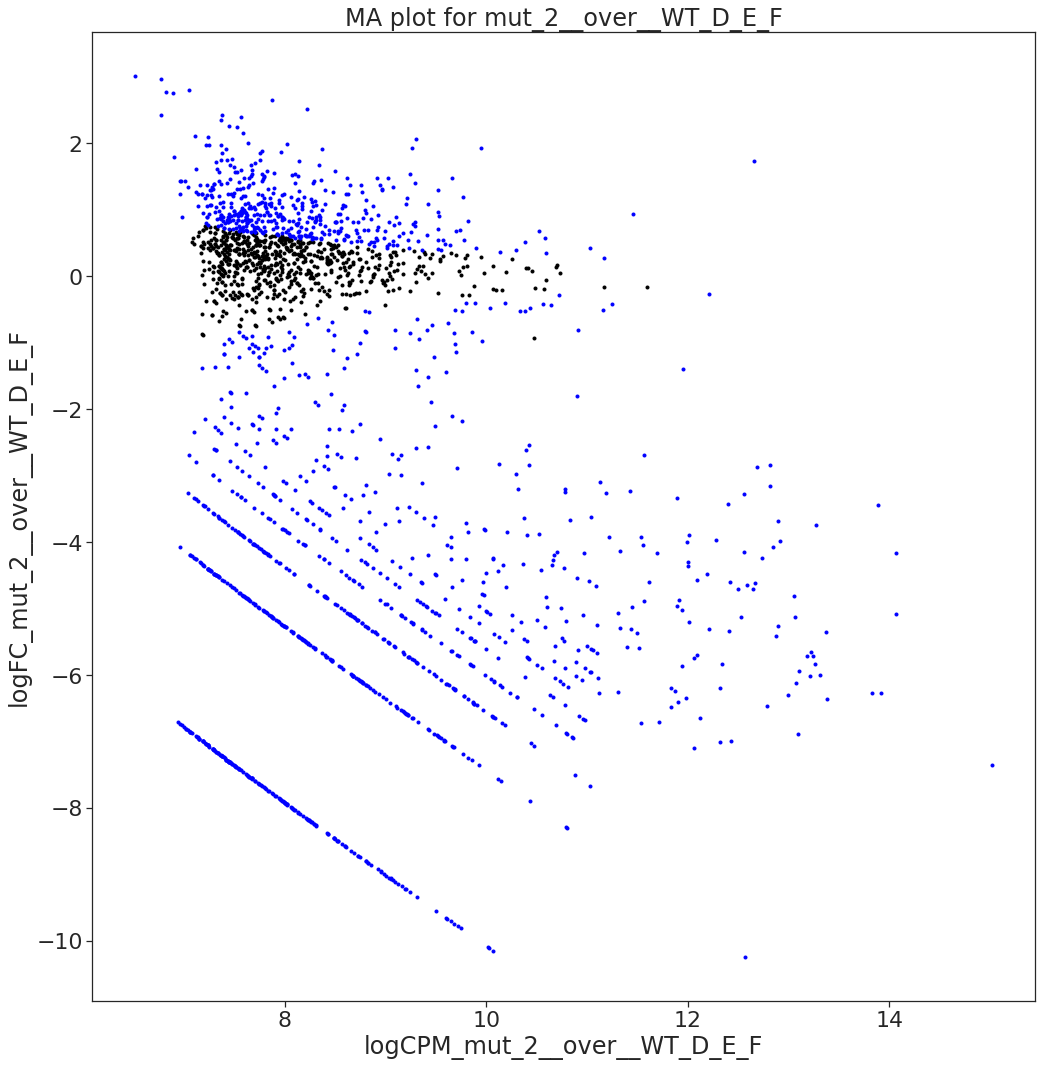

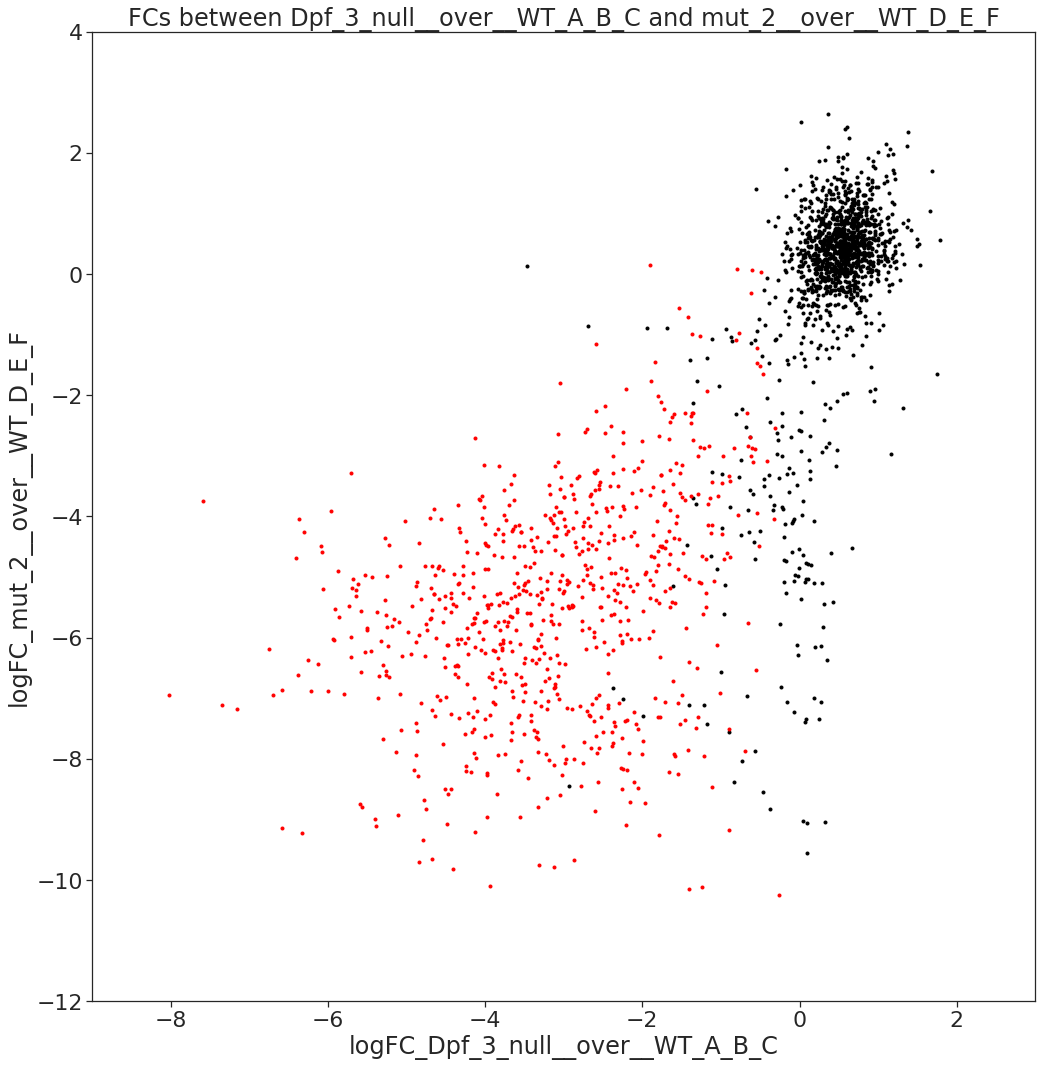

In [19]:
df_all = compare(df_1_path, df_2_path, df_1_name, df_2_name)


df_all["Significant"] = "No"
df_all.loc[df_all["id"].isin(down_regulated_Dpf_3_null_and_Dpf_3_S784A), "Significant"] = "down in Dpf_3_null_and_Dpf_3_S784A"

print(pd.DataFrame(df_all["Significant"].value_counts()))


plot_FC_correlation_mark_genes(df_all, df_1_name, df_2_name, "Significant", ["No", "down in Dpf_3_null_and_Dpf_3_S784A"])
#                                                                               f"FDR_{df_1_name}<0.05\nFDR_{df_2_name}<0.05"])

# print("*"*80)
# print(pd.DataFrame(df_all["Significant"].value_counts()))
# print("*"*80)

## dpf-3 null over WT (A,B,C) vs mut-7 over WT (D,E,F)

In [20]:
df_1_path = small_rna__WT_A_B_C__Dpf_3_null_path
df_1_name = small_rna__WT_A_B_C__Dpf_3_null_name

df_2_path = small_rna__WT_D_E_F__mut_7_path
df_2_name = small_rna__WT_D_E_F__mut_7_name

********************************************************************************
                                                                     Significant
FDR_Dpf_3_null__over__WT_A_B_C<0.05\nFDR_mut_7__over__WT_D_E_F<0.05  1279       
No                                                                   529        
FDR_mut_7__over__WT_D_E_F<0.05                                       493        
FDR_Dpf_3_null__over__WT_A_B_C<0.05                                  374        
********************************************************************************
                                                                     Significant
No                                                                   1396       
FDR_Dpf_3_null__over__WT_A_B_C<0.05\nFDR_mut_7__over__WT_D_E_F<0.05  1279       
********************************************************************************


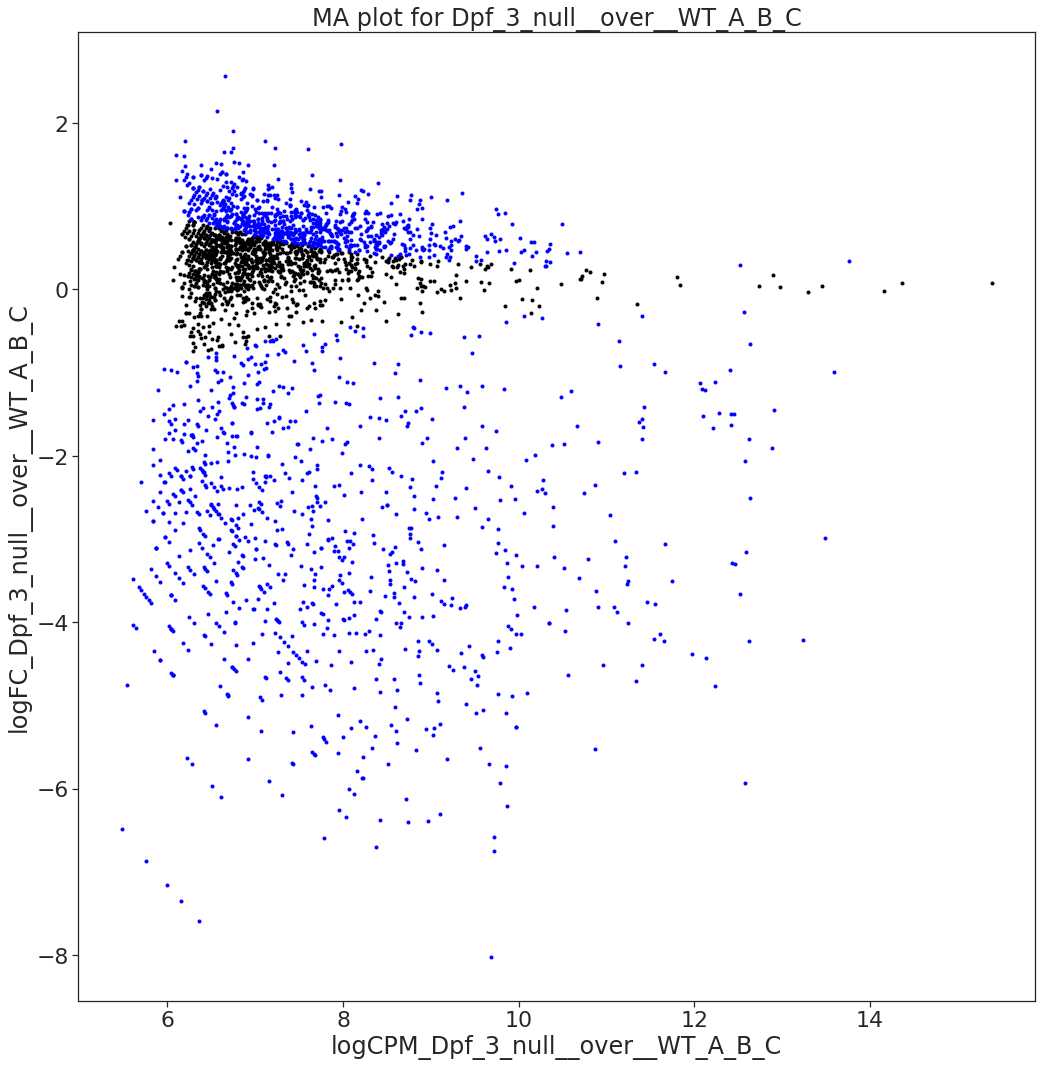

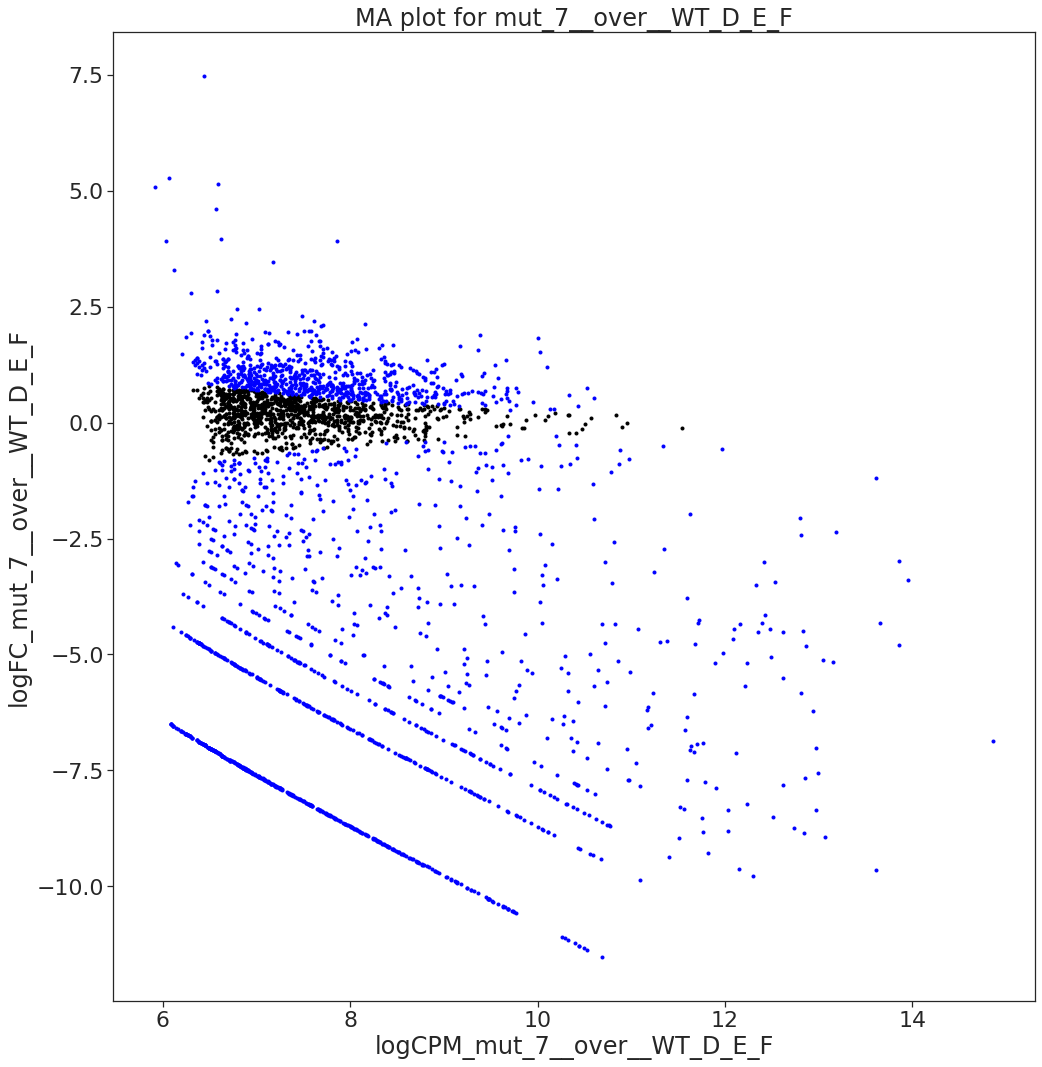

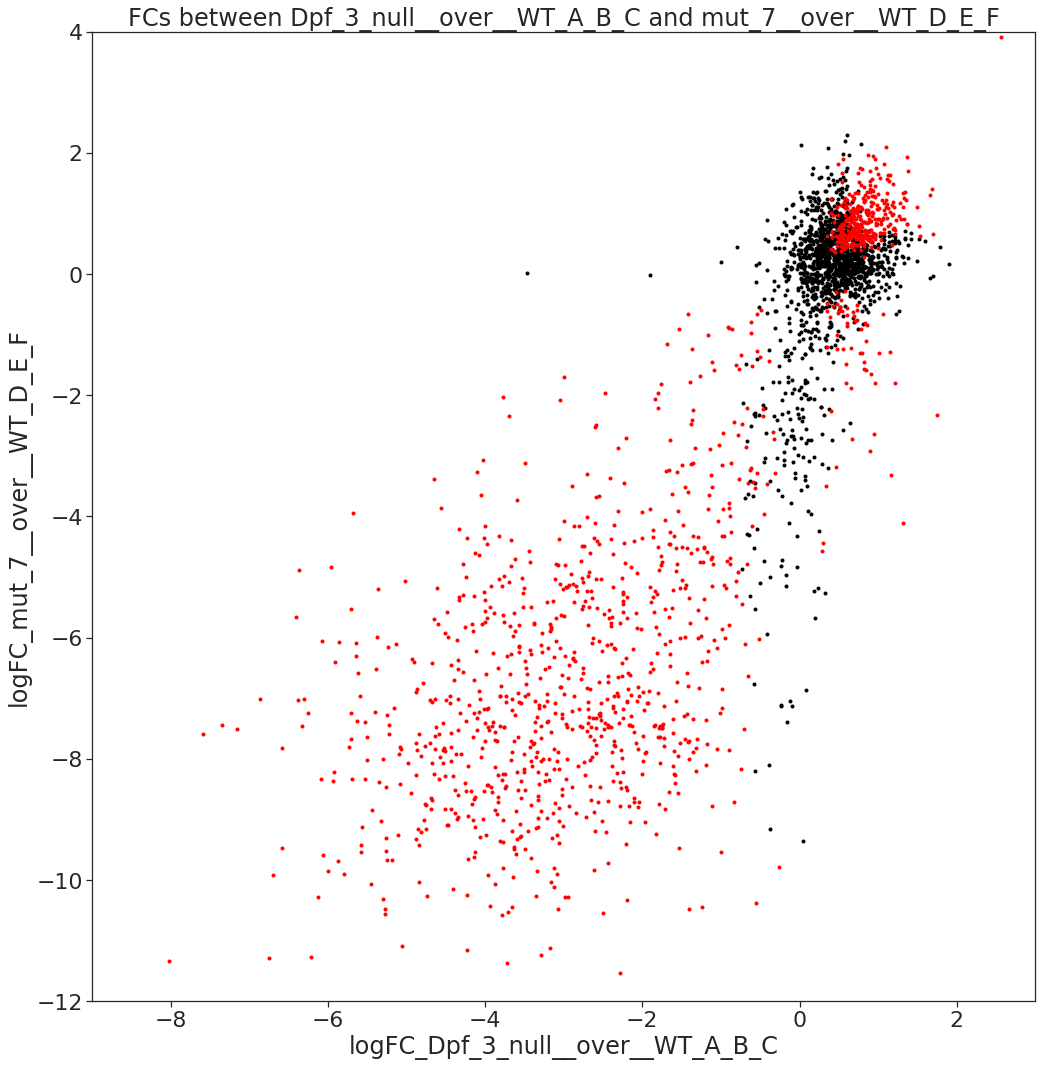

In [21]:
df_all = compare(df_1_path, df_2_path, df_1_name, df_2_name)

df_all["Significant"] = "No"

df_all.loc[(df_all[f"FDR_{df_1_name}"]<0.05),
            "Significant"] = f"FDR_{df_1_name}<0.05"

df_all.loc[(df_all[f"FDR_{df_2_name}"]<0.05),
            "Significant"] = f"FDR_{df_2_name}<0.05"

df_all.loc[(df_all[f"FDR_{df_1_name}"]<0.05) &
           (df_all[f"FDR_{df_2_name}"]<0.05),
            "Significant"] = f"FDR_{df_1_name}<0.05\nFDR_{df_2_name}<0.05"

print("*"*80)
print(pd.DataFrame(df_all["Significant"].value_counts()))

df_all["Significant"] = "No"

df_all.loc[(df_all[f"FDR_{df_1_name}"]<0.05) &
           (df_all[f"FDR_{df_2_name}"]<0.05),
            "Significant"] = f"FDR_{df_1_name}<0.05\nFDR_{df_2_name}<0.05"

plot_FC_correlation(df_all, df_1_name, df_2_name, "Significant", ["No",
                                                                  f"FDR_{df_1_name}<0.05\nFDR_{df_2_name}<0.05"])

print("*"*80)
print(pd.DataFrame(df_all["Significant"].value_counts()))
print("*"*80)

## dpf-3 S784A over WT (A,B,C) vs mut-2 over WT (D,E,F)

In [22]:
df_1_path = small_rna__WT_A_B_C__Dpf_3_S784A_path
df_1_name = small_rna__WT_A_B_C__Dpf_3_S784A_name

df_2_path = small_rna__WT_D_E_F__mut_2_path
df_2_name = small_rna__WT_D_E_F__mut_2_name

********************************************************************************
                                                                      Significant
FDR_Dpf_3_S784A__over__WT_A_B_C<0.05\nFDR_mut_2__over__WT_D_E_F<0.05  888        
No                                                                    468        
FDR_mut_2__over__WT_D_E_F<0.05                                        441        
FDR_Dpf_3_S784A__over__WT_A_B_C<0.05                                  158        
********************************************************************************
                                                                      Significant
No                                                                    1067       
FDR_Dpf_3_S784A__over__WT_A_B_C<0.05\nFDR_mut_2__over__WT_D_E_F<0.05  888        
********************************************************************************


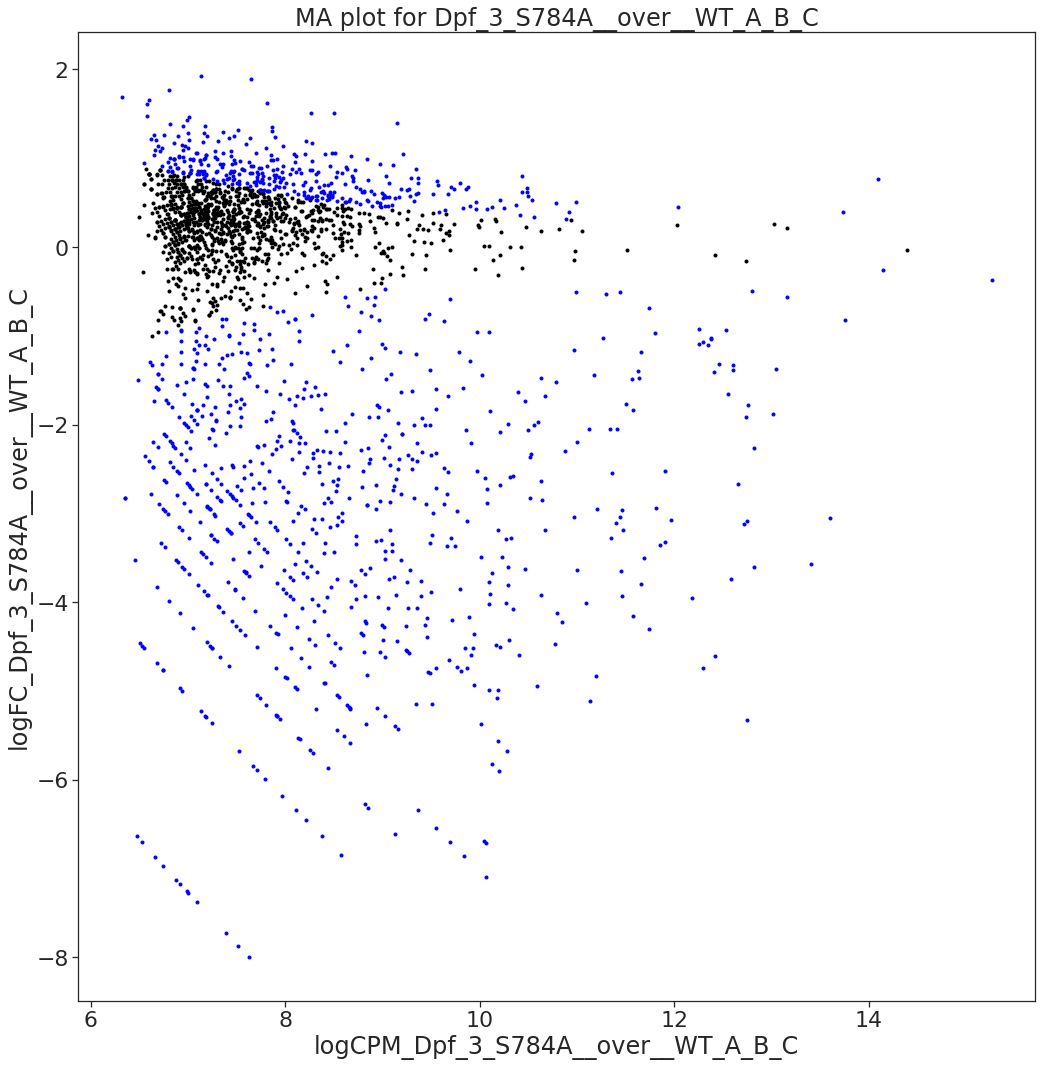

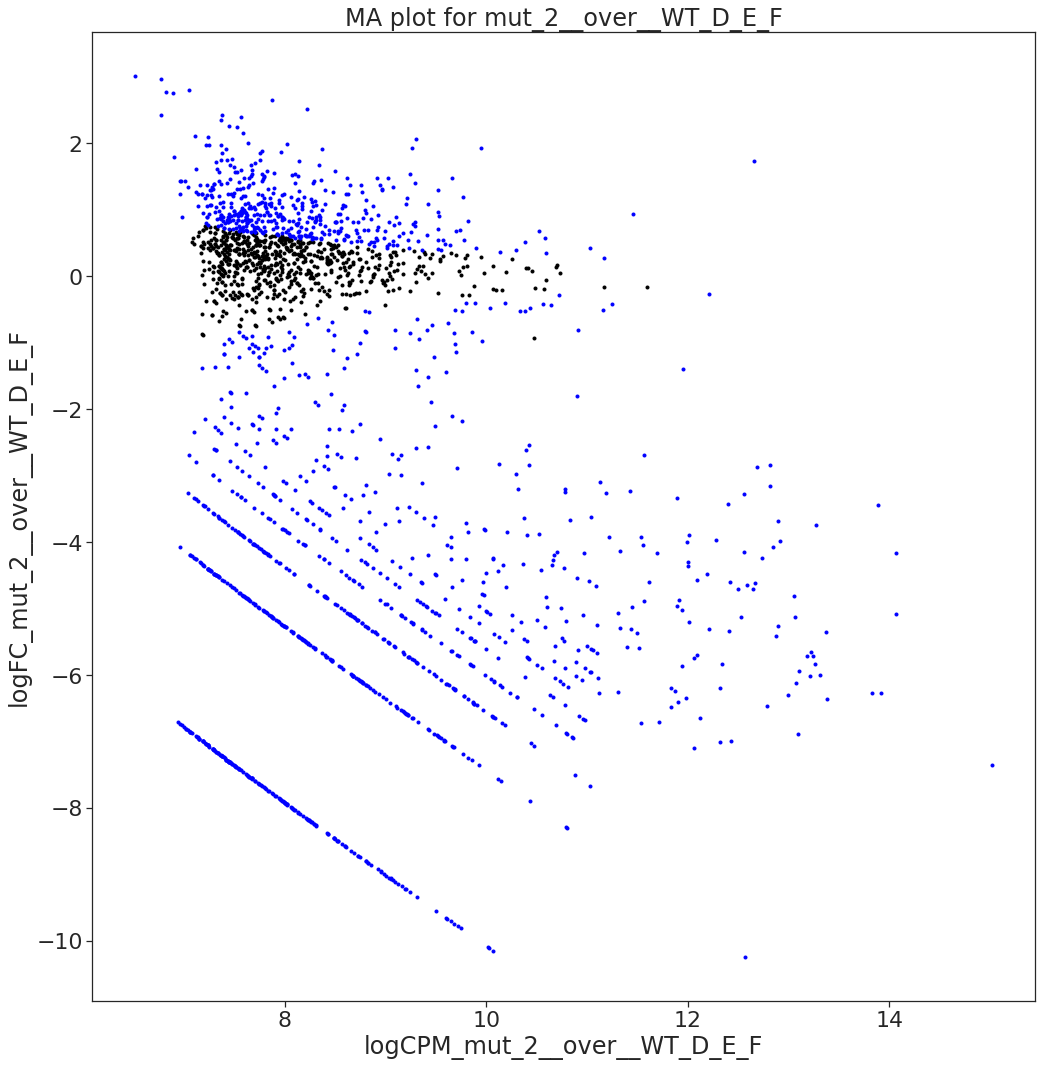

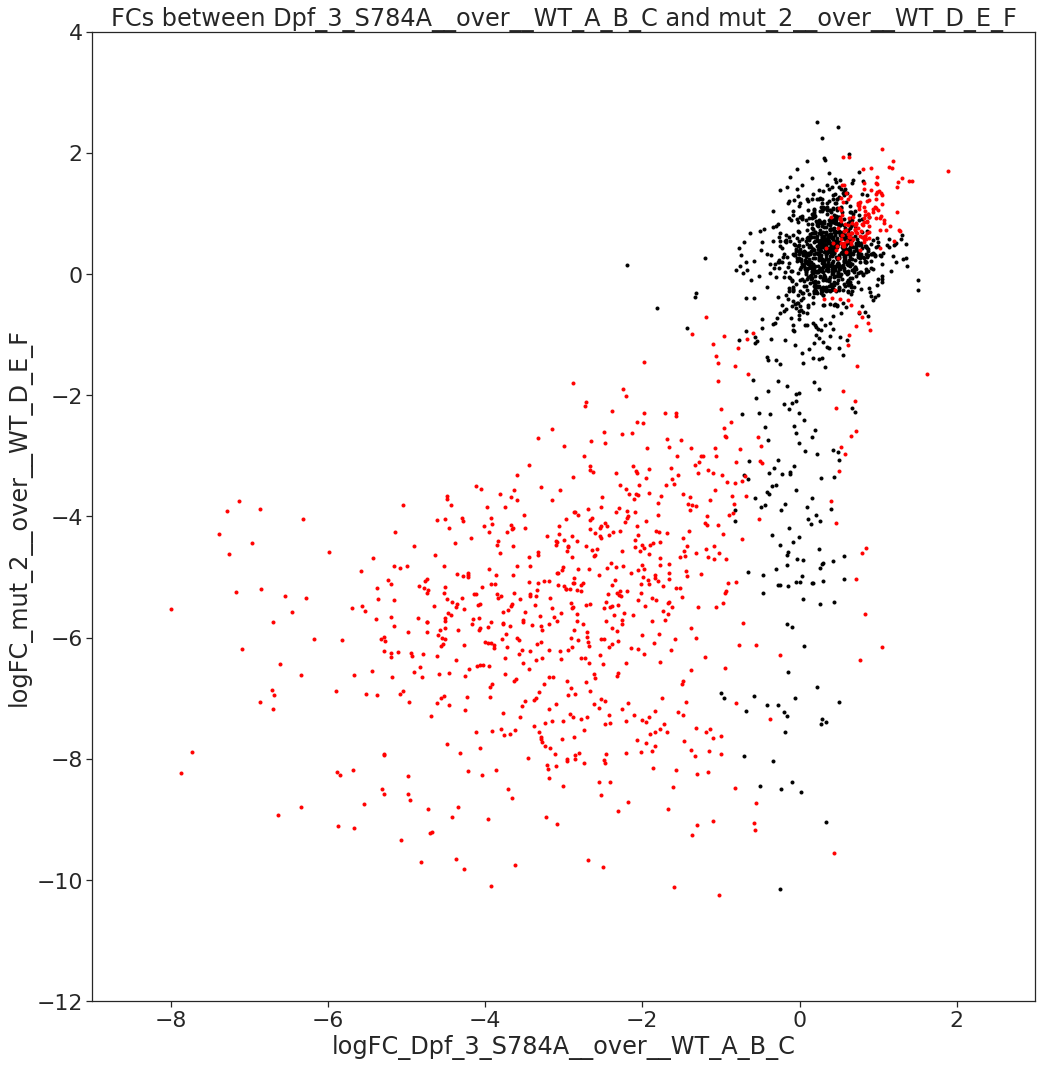

In [23]:
df_all = compare(df_1_path, df_2_path, df_1_name, df_2_name)

df_all["Significant"] = "No"

df_all.loc[(df_all[f"FDR_{df_1_name}"]<0.05),
            "Significant"] = f"FDR_{df_1_name}<0.05"

df_all.loc[(df_all[f"FDR_{df_2_name}"]<0.05),
            "Significant"] = f"FDR_{df_2_name}<0.05"

df_all.loc[(df_all[f"FDR_{df_1_name}"]<0.05) &
           (df_all[f"FDR_{df_2_name}"]<0.05),
            "Significant"] = f"FDR_{df_1_name}<0.05\nFDR_{df_2_name}<0.05"

print("*"*80)
print(pd.DataFrame(df_all["Significant"].value_counts()))

df_all["Significant"] = "No"

df_all.loc[(df_all[f"FDR_{df_1_name}"]<0.05) &
           (df_all[f"FDR_{df_2_name}"]<0.05),
            "Significant"] = f"FDR_{df_1_name}<0.05\nFDR_{df_2_name}<0.05"

plot_FC_correlation(df_all, df_1_name, df_2_name, "Significant", ["No",
                                                                  f"FDR_{df_1_name}<0.05\nFDR_{df_2_name}<0.05"])

print("*"*80)
print(pd.DataFrame(df_all["Significant"].value_counts()))
print("*"*80)

## dpf-3 S784A over WT (A,B,C) vs mut-7 over WT (D,E,F)

In [24]:
df_1_path = small_rna__WT_A_B_C__Dpf_3_S784A_path
df_1_name = small_rna__WT_A_B_C__Dpf_3_S784A_name

df_2_path = small_rna__WT_D_E_F__mut_7_path
df_2_name = small_rna__WT_D_E_F__mut_7_name

********************************************************************************
                                                                      Significant
FDR_Dpf_3_S784A__over__WT_A_B_C<0.05\nFDR_mut_7__over__WT_D_E_F<0.05  939        
FDR_mut_7__over__WT_D_E_F<0.05                                        571        
No                                                                    503        
FDR_Dpf_3_S784A__over__WT_A_B_C<0.05                                  155        
********************************************************************************
                                                                      Significant
No                                                                    1229       
FDR_Dpf_3_S784A__over__WT_A_B_C<0.05\nFDR_mut_7__over__WT_D_E_F<0.05  939        
********************************************************************************


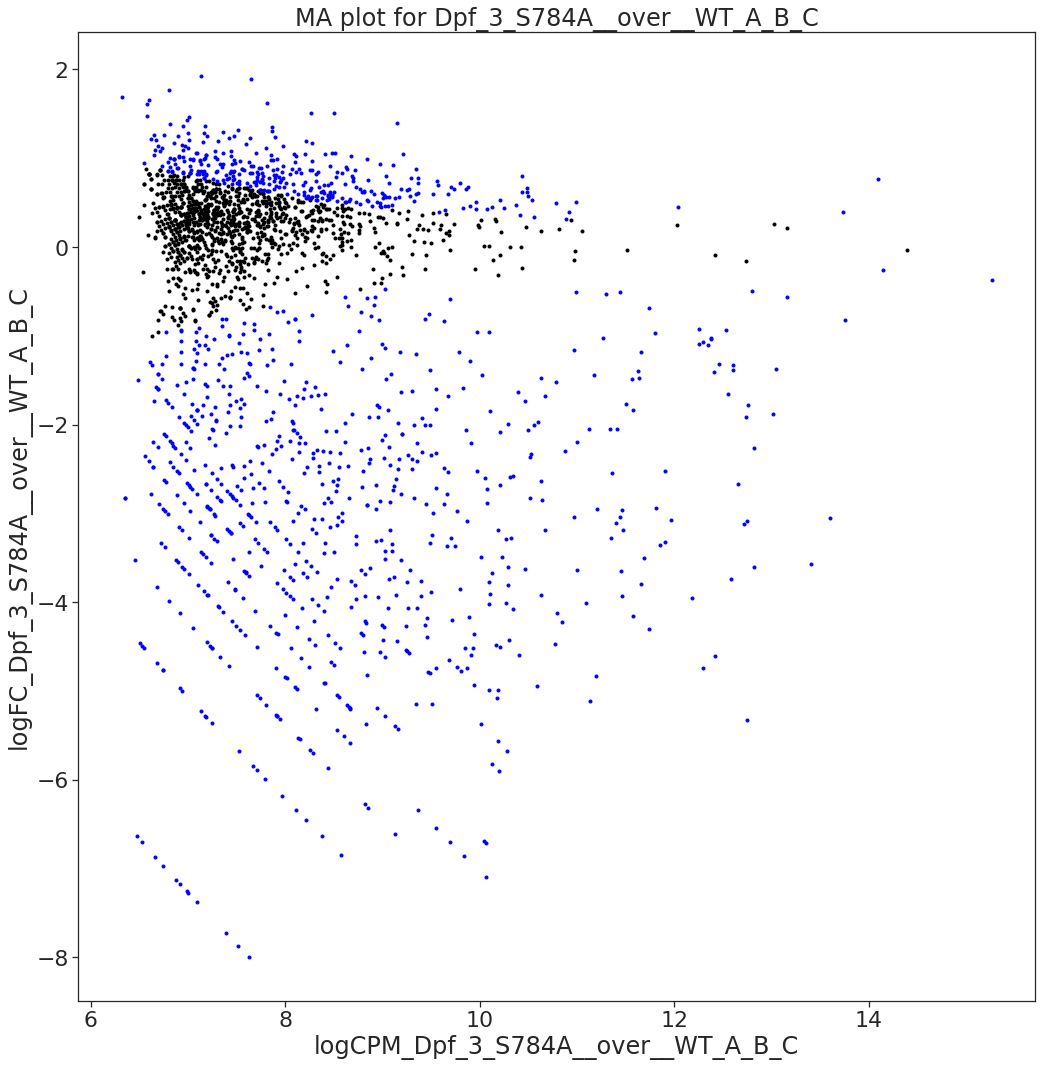

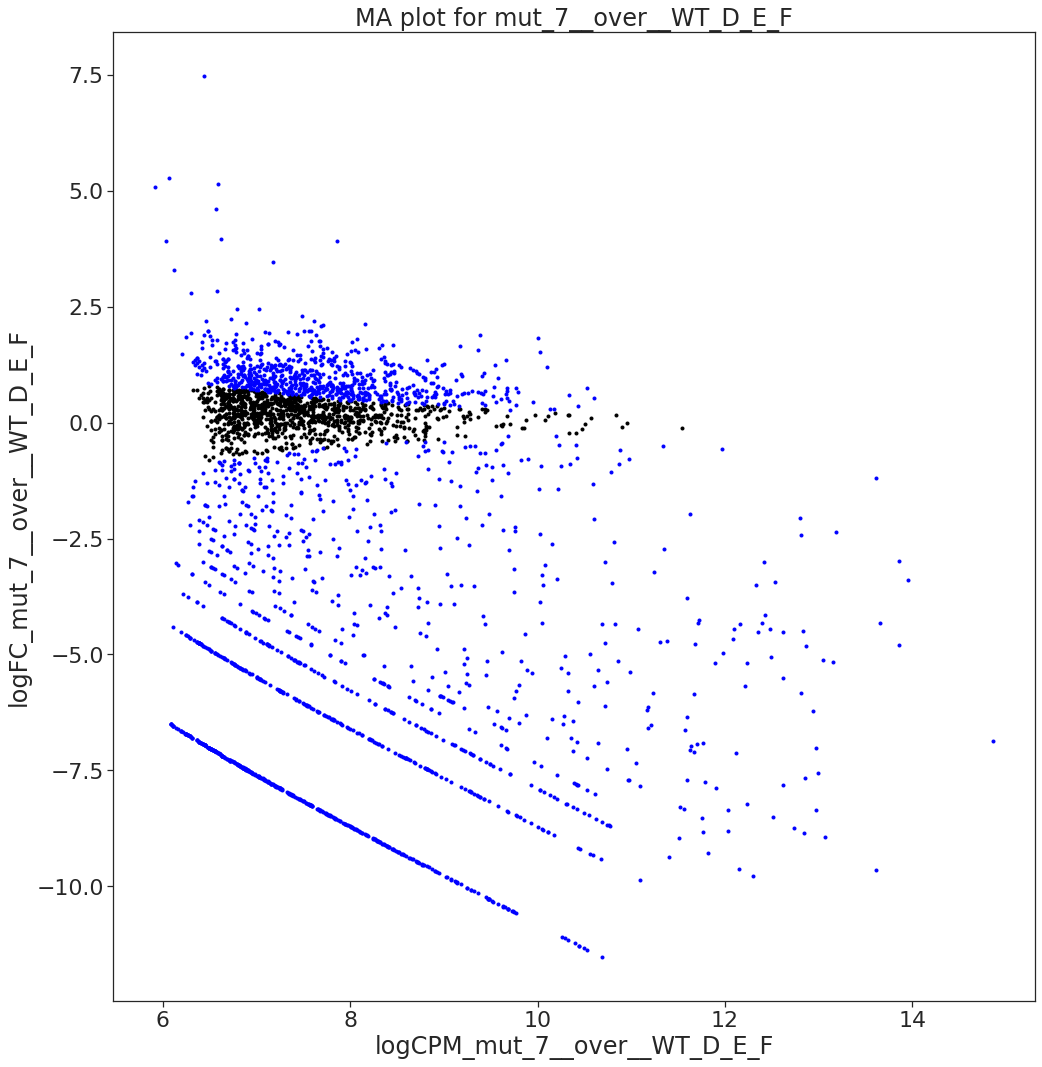

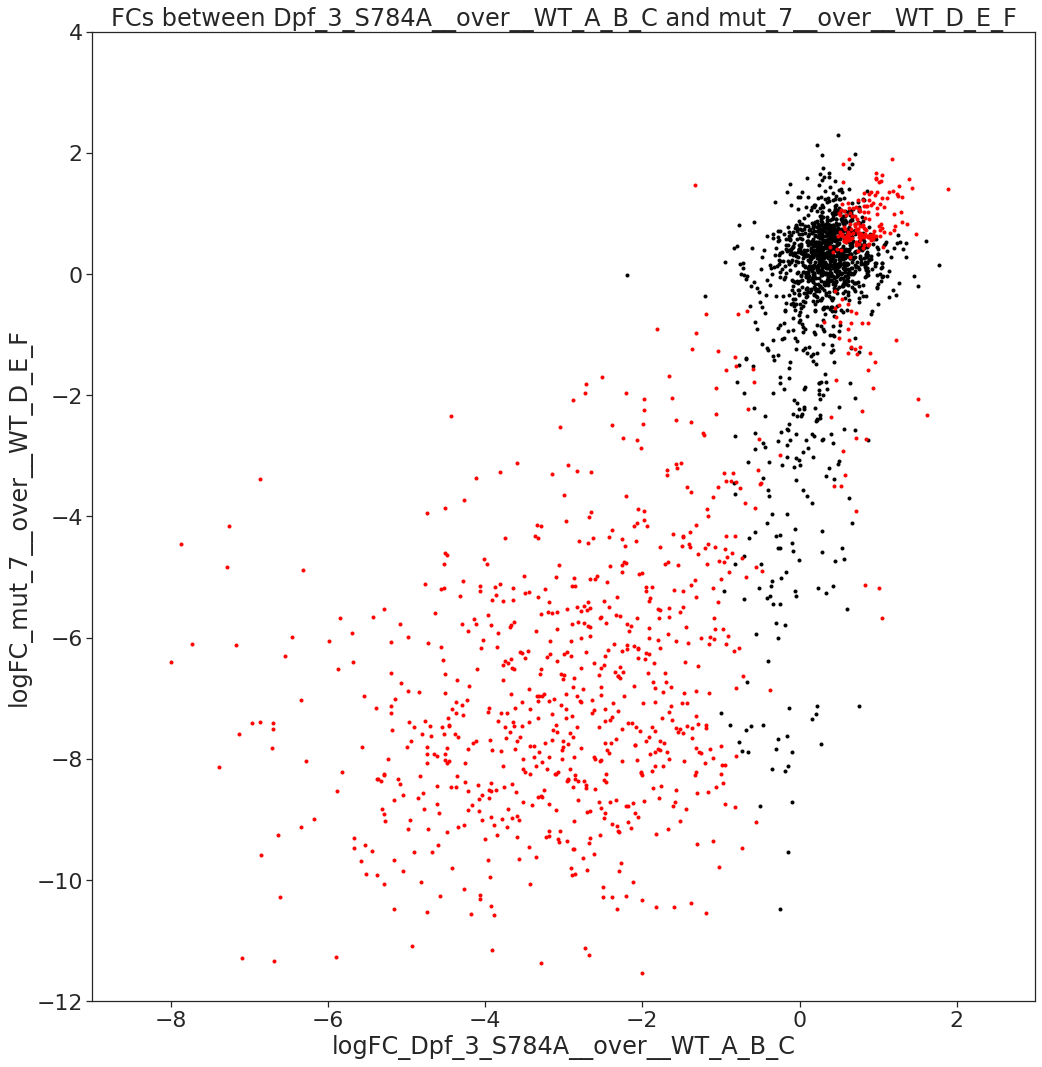

In [25]:
df_all = compare(df_1_path, df_2_path, df_1_name, df_2_name)

df_all["Significant"] = "No"

df_all.loc[(df_all[f"FDR_{df_1_name}"]<0.05),
            "Significant"] = f"FDR_{df_1_name}<0.05"

df_all.loc[(df_all[f"FDR_{df_2_name}"]<0.05),
            "Significant"] = f"FDR_{df_2_name}<0.05"

df_all.loc[(df_all[f"FDR_{df_1_name}"]<0.05) &
           (df_all[f"FDR_{df_2_name}"]<0.05),
            "Significant"] = f"FDR_{df_1_name}<0.05\nFDR_{df_2_name}<0.05"

print("*"*80)
print(pd.DataFrame(df_all["Significant"].value_counts()))

df_all["Significant"] = "No"

df_all.loc[(df_all[f"FDR_{df_1_name}"]<0.05) &
           (df_all[f"FDR_{df_2_name}"]<0.05),
            "Significant"] = f"FDR_{df_1_name}<0.05\nFDR_{df_2_name}<0.05"

plot_FC_correlation(df_all, df_1_name, df_2_name, "Significant", ["No",
                                                                  f"FDR_{df_1_name}<0.05\nFDR_{df_2_name}<0.05"])

print("*"*80)
print(pd.DataFrame(df_all["Significant"].value_counts()))
print("*"*80)